# 1. Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)
warnings.filterwarnings("ignore",category=FutureWarning)

# 2. Loading Dataset

In [4]:
df = pd.read_csv('Source_Data.csv')
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


We don't need `CUST_ID` column, so we will drop it.

In [5]:
df.drop("CUST_ID",axis=1,inplace=True)

In [6]:
df

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


# 3. Data Cleaning

### >> Task 1. Missing Values

In [7]:
df.isna().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

There are 313 missing values in `MINIMUM_PAYMENTS` and 1 missing value in `CREDIT_LIMIT`. We will fill those values with the mean of the respective columns.

In [8]:
df["MINIMUM_PAYMENTS"].fillna(df["MINIMUM_PAYMENTS"].mean(),inplace=True)
df["CREDIT_LIMIT"].fillna(df["CREDIT_LIMIT"].mean(),inplace=True)

In [9]:
df.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

### >> Task 2. Duplicate values

In [10]:
df.duplicated().any()

False

There are no duplicates in the data

### Task 3. Outliers

In [11]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE yes
BALANCE_FREQUENCY yes
PURCHASES yes
ONEOFF_PURCHASES yes
INSTALLMENTS_PURCHASES yes
CASH_ADVANCE yes
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY yes
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY yes
CASH_ADVANCE_TRX yes
PURCHASES_TRX yes
CREDIT_LIMIT yes
PAYMENTS yes
MINIMUM_PAYMENTS yes
PRC_FULL_PAYMENT yes
TENURE yes


We observed that most of our variables had outliers.Let's observe it graphically:

<Axes: xlabel='BALANCE'>

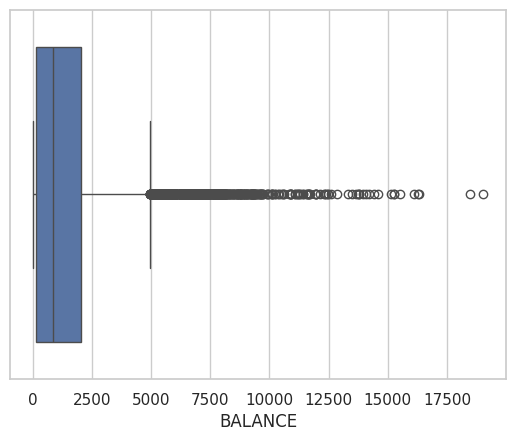

In [12]:
sns.boxplot(x=df["BALANCE"])

<Axes: xlabel='PURCHASES'>

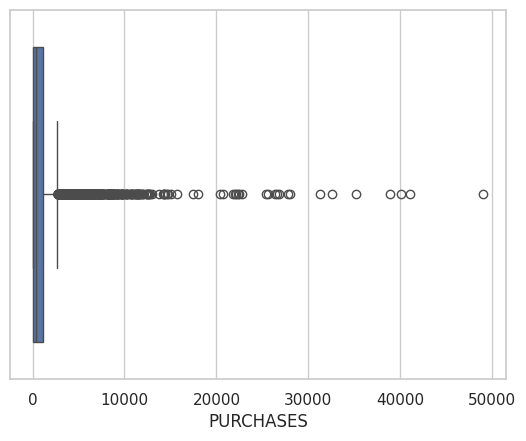

In [13]:
sns.boxplot(x=df["PURCHASES"])

In [14]:
#removing outlier except for the last column
for i in df.iloc[:,:-1]:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    up_lim = Q3 + 1.5 * IQR
    low_lim = Q1 - 1.5 * IQR
    df.loc[df[i] > up_lim,i] = up_lim
    df.loc[df[i] < low_lim,i] = low_lim

In [15]:
for i in df:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3-Q1
    up = Q3 + 1.5*IQR
    low = Q1 - 1.5*IQR

    if df[(df[i] > up) | (df[i] < low)].any(axis=None):
        print(i,"yes")
    else:
        print(i, "no")

BALANCE no
BALANCE_FREQUENCY no
PURCHASES no
ONEOFF_PURCHASES no
INSTALLMENTS_PURCHASES no
CASH_ADVANCE no
PURCHASES_FREQUENCY no
ONEOFF_PURCHASES_FREQUENCY no
PURCHASES_INSTALLMENTS_FREQUENCY no
CASH_ADVANCE_FREQUENCY no
CASH_ADVANCE_TRX no
PURCHASES_TRX no
CREDIT_LIMIT no
PAYMENTS no
MINIMUM_PAYMENTS no
PRC_FULL_PAYMENT no
TENURE yes


# 4. Exploratory Data Analysis

<ipython-input-19-6c8a39fd19a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
<ipython-input-19-6c8a39fd19a0>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df.columns[i]], kde_kws={"color": "r",

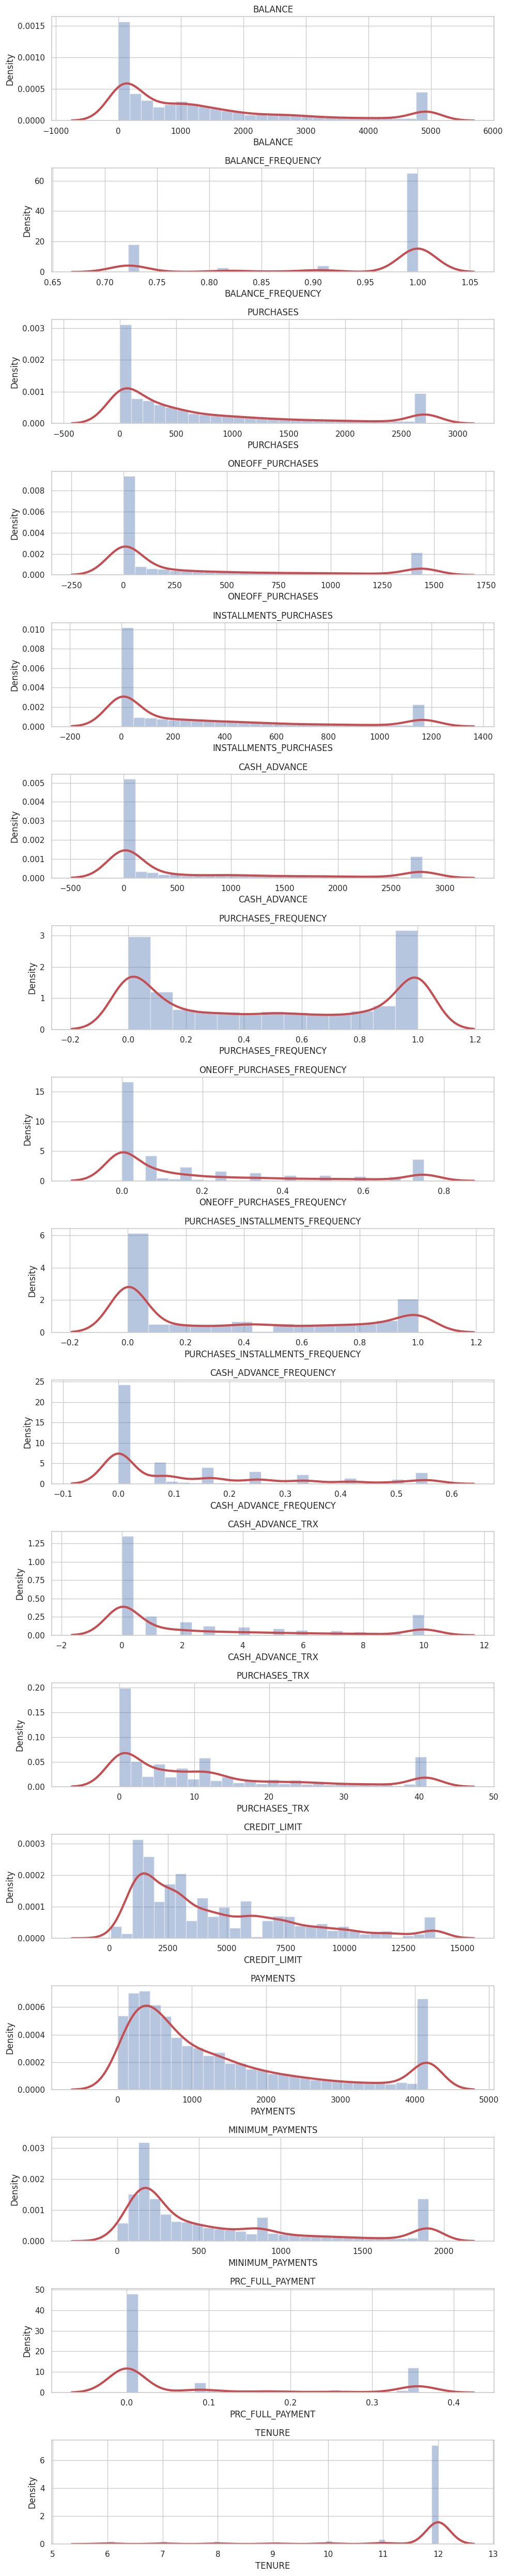

In [19]:
plt.figure(figsize=(10,50))
for i in range(len(df.columns)):
    plt.subplot(17, 1, i+1)
    #draw distribution plot of each columns
    sns.distplot(df[df.columns[i]], kde_kws={"color": "r", "lw": 3, "label": "KDE"}, hist_kws={"color": "b"})
    plt.title(df.columns[i])

plt.tight_layout()

<Axes: >

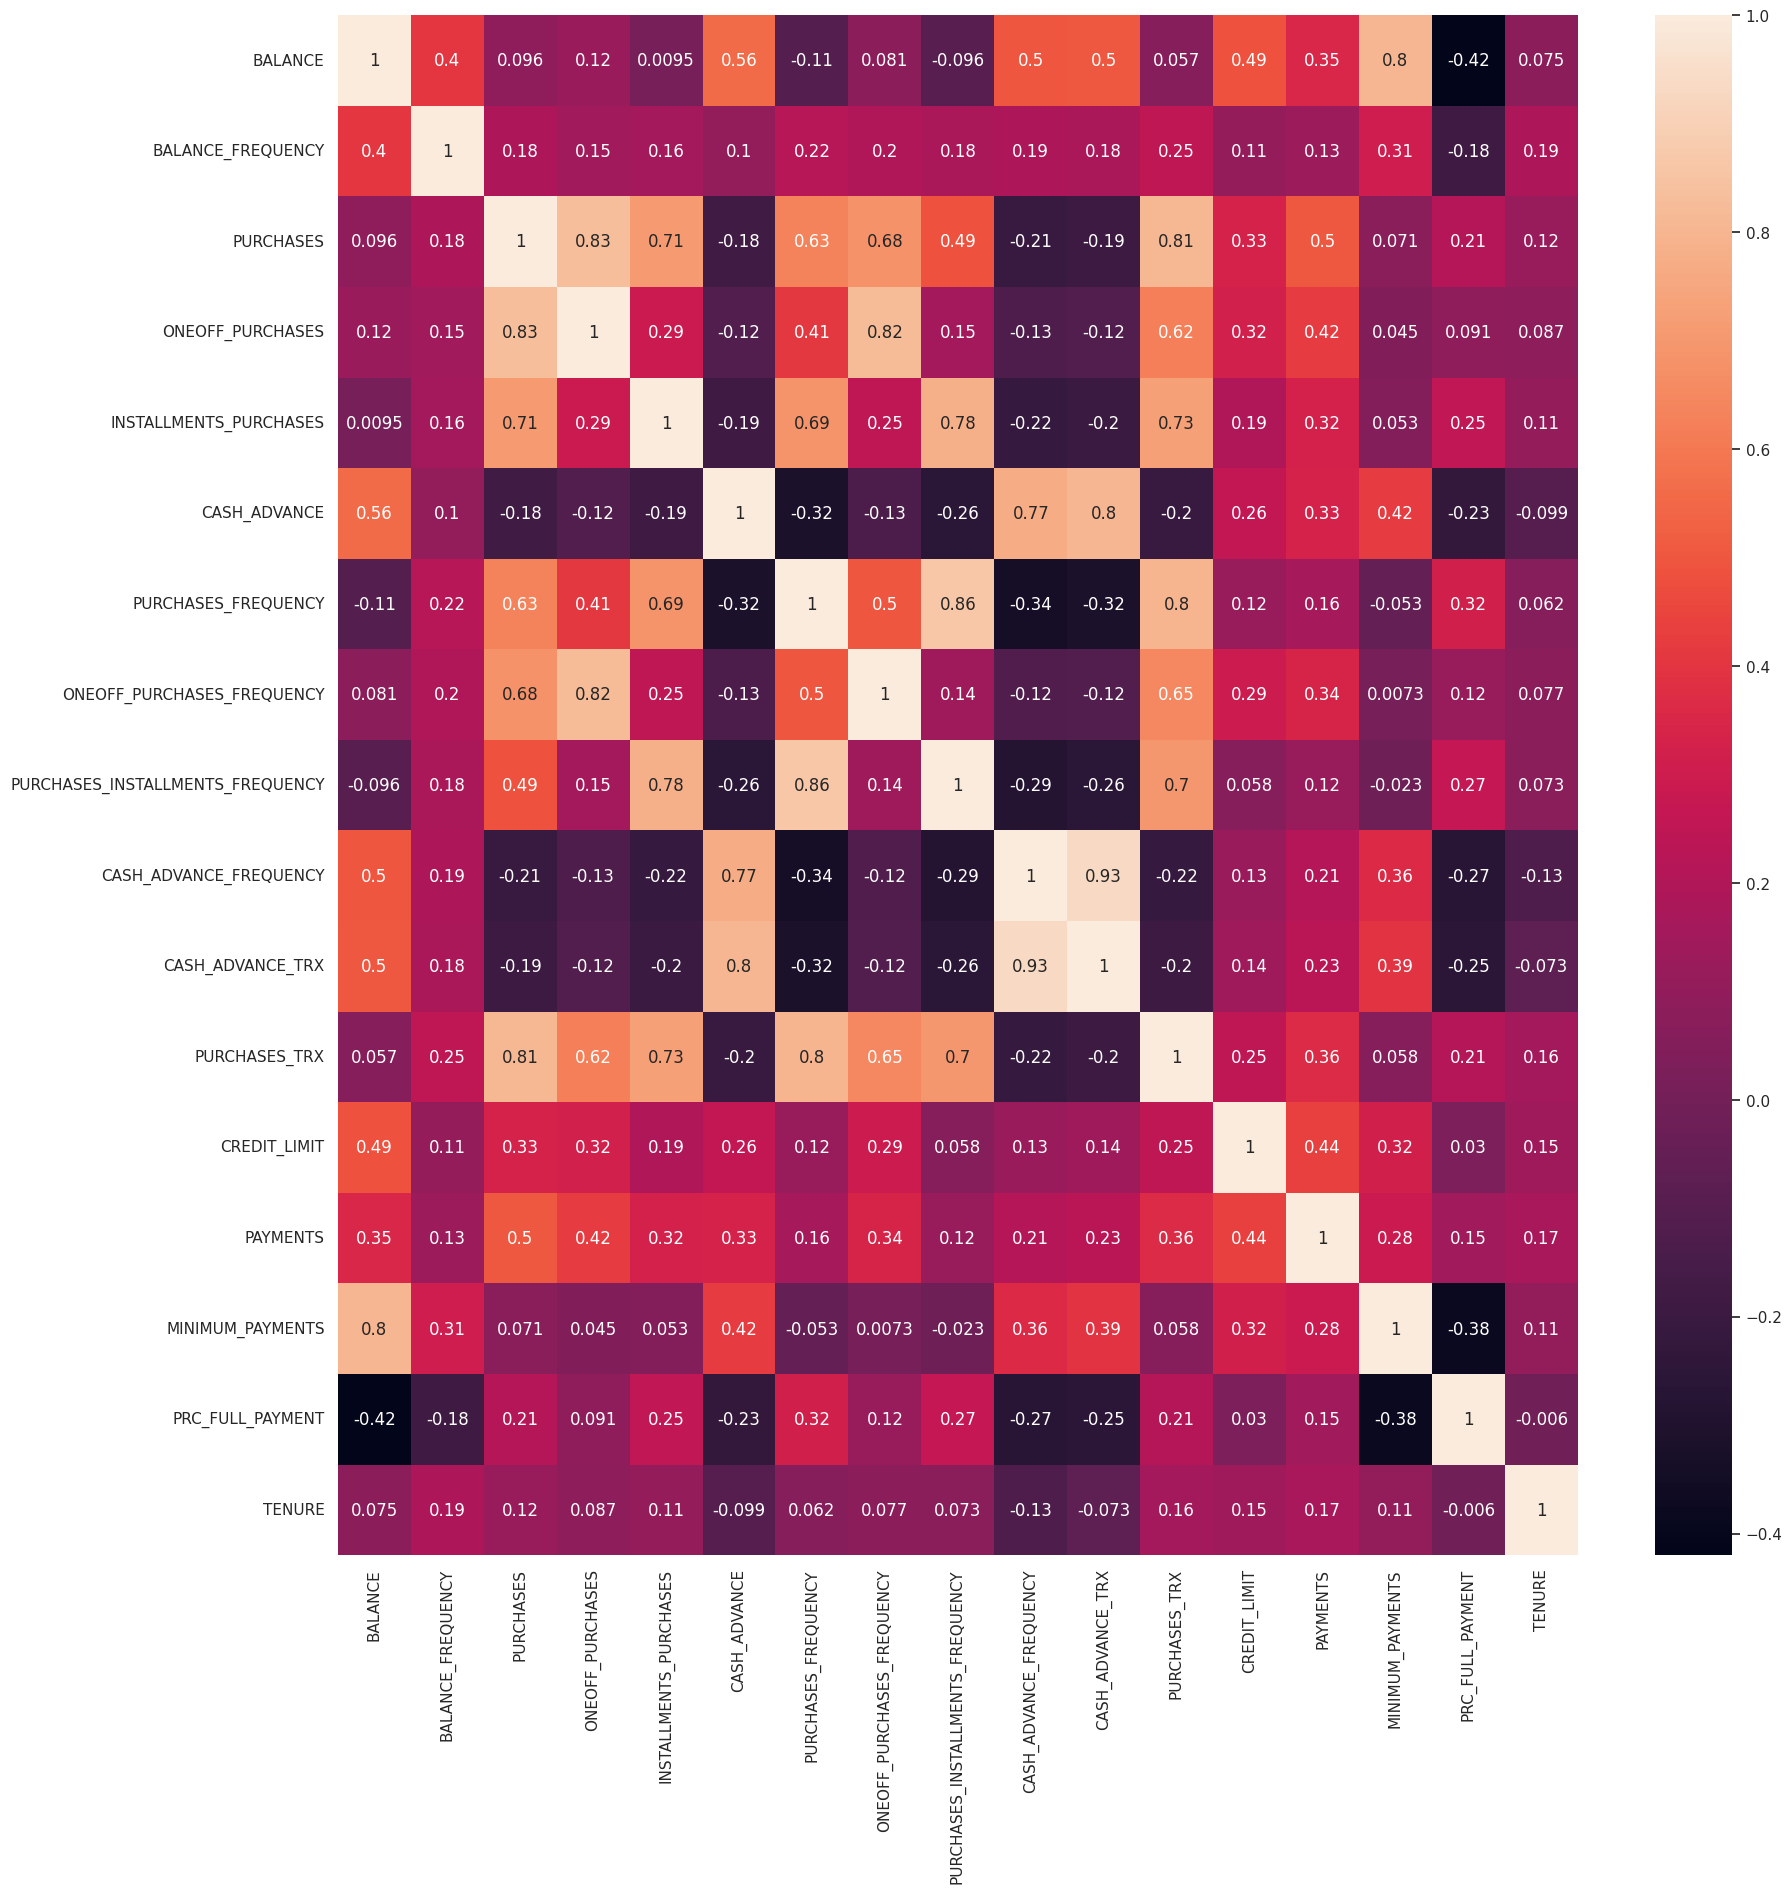

In [20]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot=True)

# 5. Finding Optimal number of Clusters

We will use yellowbrick method to find the optimal number of clusters.

### >>  Scaling the Data

In [21]:
df1 = df.copy()
scaler = StandardScaler()
df1_scaled = scaler.fit_transform(df1)

### >> Finding the Optimal number of clusters

In [22]:
from yellowbrick.cluster import KElbowVisualizer

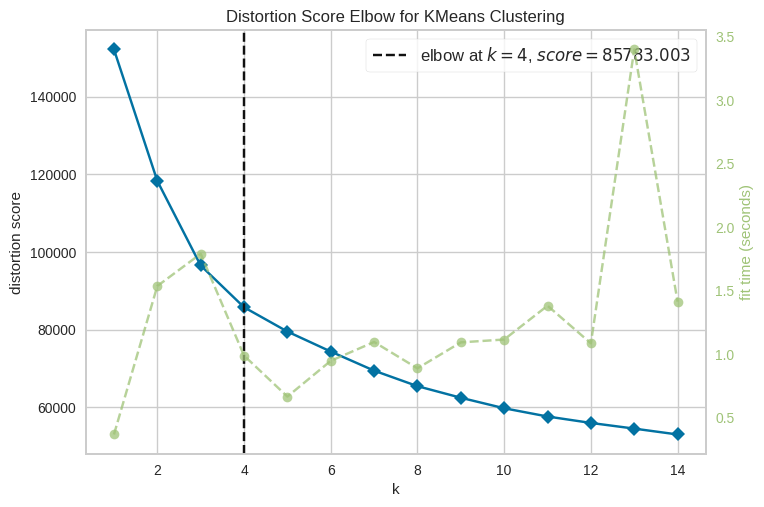

In [23]:
kmeans=KMeans()
visualizer=KElbowVisualizer(kmeans,k=(1,15))
visualizer.fit(df1_scaled)
visualizer.poof()
plt.show()

**The optimal number of clusters is 4**

# 6. K-Means

In [24]:
kmeans = KMeans(4)
kmeans.fit(df1_scaled)
labels = kmeans.labels_

In [25]:
labels

array([2, 3, 0, ..., 1, 2, 2], dtype=int32)

In [26]:
kmeans.cluster_centers_.shape


(4, 17)

In [27]:
cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = [df1.columns])
cluster_centers


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.311248,0.435538,1.682328,1.612139,0.991545,-0.249862,1.020456,1.513131,0.688726,-0.293449,-0.274146,1.516049,0.708649,0.940140,0.161710,0.271056,0.259130
1,-0.590310,-0.018780,-0.032596,-0.483725,0.607011,-0.573835,0.913380,-0.407529,1.055205,-0.587854,-0.572432,0.288833,-0.365769,-0.406055,-0.367222,0.576750,-0.039886
2,-0.372084,-0.383624,-0.541423,-0.287408,-0.631444,-0.306032,-0.747620,-0.289515,-0.728109,-0.252038,-0.302236,-0.648801,-0.374945,-0.462450,-0.313892,-0.288236,-0.048222
3,1.105683,0.323411,-0.519319,-0.375594,-0.489542,1.481665,-0.672929,-0.372419,-0.574120,1.439921,1.495392,-0.557220,0.474315,0.469801,0.868005,-0.417508,-0.102312


In [28]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = [df1.columns])
cluster_centers

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,1869.037704,0.979922,2216.732518,1179.442527,688.356241,422.992396,0.899909,0.571611,0.638155,0.075392,1.446182,31.394468,6817.066638,2543.633755,686.211196,0.124794,11.864101
1,482.936103,0.929503,708.481724,106.790073,536.019302,99.517768,0.856934,0.080587,0.783803,0.024558,0.426734,15.390446,3181.700120,830.284126,383.657452,0.167165,11.463941
2,818.447700,0.889013,260.975979,207.264384,45.393859,366.908806,0.190294,0.110758,0.075068,0.082543,1.350182,3.162833,3150.653265,758.508387,414.162879,0.047271,11.452785
3,3090.444358,0.967478,280.415822,162.131177,101.609552,2151.851408,0.220272,0.089563,0.136267,0.374688,7.493909,4.357143,6024.181181,1945.016660,1090.217618,0.029353,11.380399


* **`First Customers cluster (Transactors)`**: Those are customers who pay least amount of intrerest charges and careful with their  money.

    Cluster with lowest balance (\\$104) and cash advance (\\$303), Percentage of full payment = 23%
    

* **`Second customers cluster (revolvers)`**: Who use credit card as a loan (most lucrative sector).

    Highest balance (\\$5000) and cash advance (\\$5000), low purchase frequency, high cash advance frequency (0.5), high cash advance transactions (16) and low percentage of full payment (3%)
    
    
* **`Third customer cluster (VIP/Prime)`**: high credit limit (\$16K) and highest percentage of full payment, target for increase credit limit and increase spending habits


* **`Fourth customer cluster (low_tenure)`** : these are customers with low tenure (7 years), low balance

In [29]:
y_kmeans = kmeans.fit_predict(df1_scaled)
y_kmeans

array([0, 2, 1, ..., 3, 0, 0], dtype=int32)

In [30]:
# concate main dataframe with the cluster labels
creditcard_df_cluster = pd.concat([df1, pd.DataFrame({'cluster':labels})], axis = 1)
creditcard_df_cluster.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,cluster
0,40.900749,0.818182,95.40,0.0000,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,2
1,3202.467416,0.909091,0.00,0.0000,0.0,2784.552848,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,3
2,2495.148862,1.000000,773.17,773.1700,0.0,0.000000,1.000000,0.750000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.722223,1499.00,1443.5125,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,2
4,817.714335,1.000000,16.00,16.0000,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,2


In [ ]:
for i in df1.columns:
    plt.figure(figsize = (35, 5))
    for j in range(7):
        plt.subplot(1,7,j+1)
        cluster = creditcard_df_cluster[creditcard_df_cluster['cluster'] == j]
        cluster[i].hist(bins = 20)
        plt.title('{}    \nCluster {} '.format(i,j))

    plt.show()

# 7. PCA

In [31]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(df1_scaled)
principal_comp

array([[-1.62478897, -2.38161435],
       [-2.1583894 ,  2.28949731],
       [ 1.19898235,  0.28070656],
       ...,
       [-0.46320755, -2.99044469],
       [-2.41851866, -2.46663187],
       [ 0.18008676, -0.90828606]])

In [32]:
# Create a dataframe with the two components
pca_df = pd.DataFrame(data = principal_comp, columns =['pca1','pca2'])
pca_df.head()

,pca1,pca2
0,-1.624789,-2.381614
1,-2.158389,2.289497
2,1.198982,0.280707
3,-0.495849,-0.185933
4,-1.632622,-1.597278


In [33]:
pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,-1.624789,-2.381614,2
1,-2.158389,2.289497,3
2,1.198982,0.280707,0
3,-0.495849,-0.185933,2
4,-1.632622,-1.597278,2


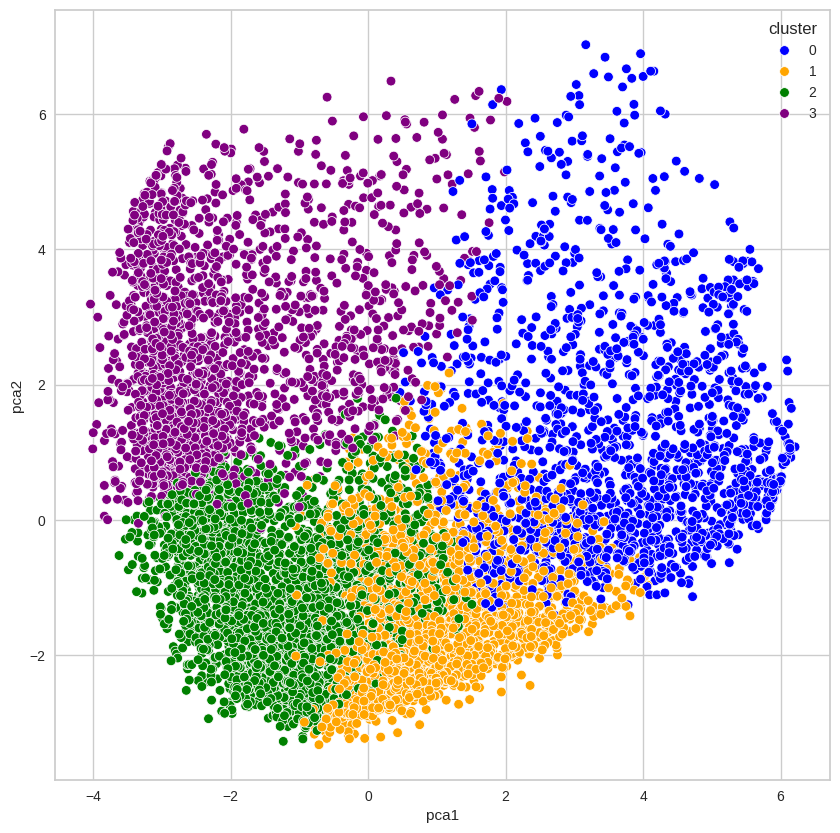

In [35]:
plt.figure(figsize=(10,10))
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['Blue','Orange','Green','Purple'])
plt.show()

# 8. Conclusion

**In our analysis of credit card usage among 9,000 individuals, we employed multiple clustering techniques to segment the data into distinct groups. Initially, we explored various clustering algorithms to determine the optimal number of clusters, ensuring the most meaningful segmentation. Through rigorous evaluation, we identified the most suitable method for our dataset. Subsequently, we applied Principal Component Analysis (PCA) to reduce dimensionality and enhance the interpretability of our results. This comprehensive approach allowed us to uncover significant patterns and insights within the credit card usage data, facilitating a deeper understanding of customer behavior and preferences. Our findings provide valuable information for targeted marketing strategies and personalized financial services, ultimately contributing to improved customer satisfaction and business performance.**